## Analysis: By feature and model
### Training on augmented data, Testing on untransformed data

In [161]:
import pandas as pd
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

## Torch Models

In [162]:
V_stft = pd.read_csv('../src/predict/predictions/vanilla_test_stft.csv', names=['Pred'])
true_V_stft = pd.read_csv('../src/predict/predictions/true_vanilla_test_stft.csv', names=['True'])

V_mfcc = pd.read_csv('../src/predict/predictions/vanilla_test_mfcc.csv', names=['Pred'])
true_V_mfcc = pd.read_csv('../src/predict/predictions/true_vanilla_test_mfcc.csv', names=['True'])

V_stft_bpm = pd.read_csv('../src/predict/predictions/vanilla_test_stft_tempo.csv', names=['Pred'])
true_V_stft_bpm = pd.read_csv('../src/predict/predictions/true_vanilla_test_stft_tempo.csv', names=['True'])

V_mfcc_bpm = pd.read_csv('../src/predict/predictions/vanilla_test_mfcc_tempo.csv', names=['Pred'])
true_V_mfcc_bpm = pd.read_csv('../src/predict/predictions/true_vanilla_test_mfcc_tempo.csv', names=['True'])

OH_stft = pd.read_csv('../src/predict/predictions/one_hidden_test_stft.csv', names=['Pred'])
true_OH_stft = pd.read_csv('../src/predict/predictions/true_one_hidden_test_stft.csv', names=['True'])

OH_mfcc = pd.read_csv('../src/predict/predictions/one_hidden_test_mfcc.csv', names=['Pred'])
true_OH_mfcc = pd.read_csv('../src/predict/predictions/true_one_hidden_test_mfcc.csv', names=['True'])

OH_stft_bpm = pd.read_csv('../src/predict/predictions/one_hidden_test_stft_tempo.csv', names=['Pred'])
true_OH_stft_bpm = pd.read_csv('../src/predict/predictions/true_one_hidden_test_stft_tempo.csv', names=['True'])

OH_mfcc_bpm = pd.read_csv('../src/predict/predictions/one_hidden_test_mfcc_tempo.csv', names=['Pred'])
true_OH_mfcc_bpm = pd.read_csv('../src/predict/predictions/true_one_hidden_test_mfcc_tempo.csv', names=['True'])

In [163]:
vanilla_stft_results = pd.concat([V_stft, true_V_stft], axis = 1)
vanilla_mfcc_results = pd.concat([V_mfcc, true_V_mfcc], axis = 1)
vanilla_stft_bpm_results = pd.concat([V_stft_bpm, true_V_stft_bpm], axis = 1)
vanilla_mfcc_bpm_results = pd.concat([V_mfcc_bpm, true_V_mfcc_bpm], axis = 1)
one_hidden_stft_results = pd.concat([OH_stft, true_OH_stft], axis = 1)
one_hidden_mfcc_results = pd.concat([OH_mfcc, true_OH_mfcc], axis = 1)
one_hidden_stft_bpm_results = pd.concat([OH_stft_bpm, true_OH_stft_bpm], axis = 1)
one_hidden_mfcc_bpm_results = pd.concat([OH_mfcc_bpm, true_OH_mfcc_bpm], axis = 1)

In [164]:
df_list = [vanilla_stft_results, vanilla_mfcc_results, vanilla_stft_bpm_results, vanilla_mfcc_bpm_results,
           one_hidden_stft_results, one_hidden_mfcc_results, one_hidden_stft_bpm_results, one_hidden_mfcc_bpm_results]
acc_list = []
for df in df_list:
    acc_list.append(accuracy_score(y_true=df['True'], y_pred=df['Pred']))

In [165]:
torch_results = pd.DataFrame(acc_list, columns=['Accuracy'])
torch_results.index = ['Linear_stft', 'Linear_mfcc', 'Linear_stft_bpm', 'Linear_mfcc_bpm',
                       '1_hidden_stft', '1_hidden_mfcc','1_hidden_stft_bpm', '1_hidden_mfcc_bpm']

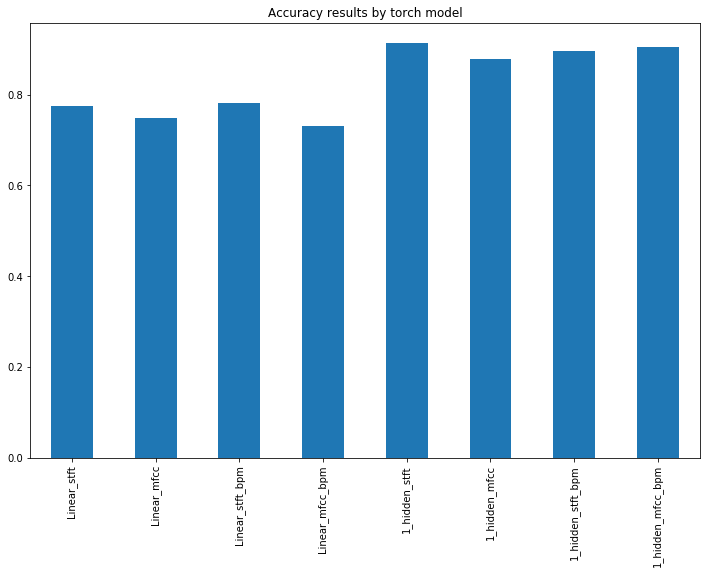

In [168]:
ax = torch_results.plot.bar(legend=False,  figsize=(12,8))
ax.set_title('Accuracy results by torch model');

**Conclusion:** Using the Short-time Fourier Transform as input feature yields better results than Mel-frequency Cepstral Coefficients (num_ceps=20) for both the linear and non-linear torch models. Perhaps a combination of these features could yield an even better result.

## Training Errors: Torch models

In [169]:
V_stft = pd.read_csv('../src/train/train_errors/vanilla_stft.csv', names=['Linear_stft'])
V_mfcc = pd.read_csv('../src/train/train_errors/vanilla_mfcc.csv', names=['Linear_mfcc'])

V_stft_bpm = pd.read_csv('../src/train/train_errors/vanilla_stft_tempo.csv', names=['Linear_stft_bpm'])
V_mfcc_bpm = pd.read_csv('../src/train/train_errors/vanilla_mfcc_tempo.csv', names=['Linear_mfcc_bpm'])

OH_stft = pd.read_csv('../src/train/train_errors/one_hidden_stft.csv', names=['1_hidden_stft'])
OH_mfcc = pd.read_csv('../src/train/train_errors/one_hidden_mfcc.csv', names=['1_hidden_mfcc'])

OH_stft_bpm = pd.read_csv('../src/train/train_errors/one_hidden_stft_tempo.csv', names=['1_hidden_stft_bpm'])
OH_mfcc_bpm = pd.read_csv('../src/train/train_errors/one_hidden_mfcc_tempo.csv', names=['1_hidden_mfcc_bpm'])


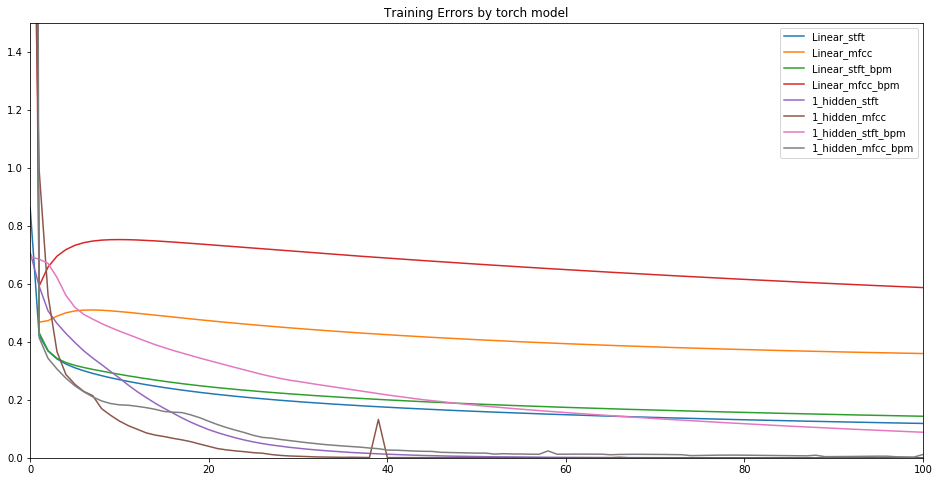

In [170]:
train_errors = pd.concat([V_stft, V_mfcc, V_stft_bpm, V_mfcc_bpm,  
                          OH_stft, OH_mfcc, OH_stft_bpm, OH_mfcc_bpm], axis =1)
ax = train_errors.plot(figsize=(16,8), title='Training Errors by torch model')
ax.set_ylim([0,1.5])
ax.set_xlim([0,100]);


**Conclusion:** The non-linear model using MFCCs as features approaches zero before any other model. However, it fluctuates over time, perhaps jumping in and out of local minima. The non-linear model using STFT features successfully minimizes error, while not quite as fast as with MFCC features, but stays consistant over the observed iterations. The linear models require more iterations to reduce error to comparable levels. In this case, the STFT features outperform the MFCC features. But from the test results, the STFT models generalize better. 

## sklearn Models (Logistic Regression, Random Forest)

In [172]:
SK_stft = pd.read_csv('../../../Source/Data/results_sklearn_augmented_stft.csv')
SK_mfcc = pd.read_csv('../../../Source/Data/results_sklearn_augmented_mfcc.csv')

SK_stft_bpm = pd.read_csv('../../../Source/Data/results_sklearn_augmented_stft_tempo.csv')
SK_mfcc_bpm = pd.read_csv('../../../Source/Data/results_sklearn_augmented_mfcc_tempo.csv')

In [173]:
acc_stft_lr = accuracy_score(y_pred=SK_stft['Predict_lr'], y_true=SK_stft['True'])
acc_stft_rf = accuracy_score(y_pred=SK_stft['Predict_rf'], y_true=SK_stft['True'])

acc_stft_bpm_lr = accuracy_score(y_pred=SK_stft_bpm['Predict_lr'], y_true=SK_stft_bpm['True'])
acc_stft_bpm_rf = accuracy_score(y_pred=SK_stft_bpm['Predict_rf'], y_true=SK_stft_bpm['True'])

acc_mfcc_lr = accuracy_score(y_pred=SK_mfcc['Predict_lr'], y_true=SK_mfcc['True'])
acc_mfcc_rf = accuracy_score(y_pred=SK_mfcc['Predict_rf'], y_true=SK_mfcc['True'])

acc_mfcc_bpm_lr = accuracy_score(y_pred=SK_mfcc_bpm['Predict_lr'], y_true=SK_mfcc_bpm['True'])
acc_mfcc_bpm_rf = accuracy_score(y_pred=SK_mfcc_bpm['Predict_rf'], y_true=SK_mfcc_bpm['True'])

In [175]:
sklearn_results = pd.DataFrame([acc_stft_lr,acc_mfcc_lr, acc_stft_bpm_lr, acc_mfcc_bpm_lr, 
                                acc_stft_rf, acc_mfcc_rf, acc_stft_bpm_rf, acc_mfcc_bpm_rf], 
                               columns=['Accuracy'])
sklearn_results.index = ['LogReg_stft', 'LogReg_mfcc','LogReg_stft_bpm', 'LogReg_mfcc_bpm', 
                         'RndFst_stft','RndFst_mfcc', 'RndFst_stft_bpm','RndFst_mfcc_bpm']

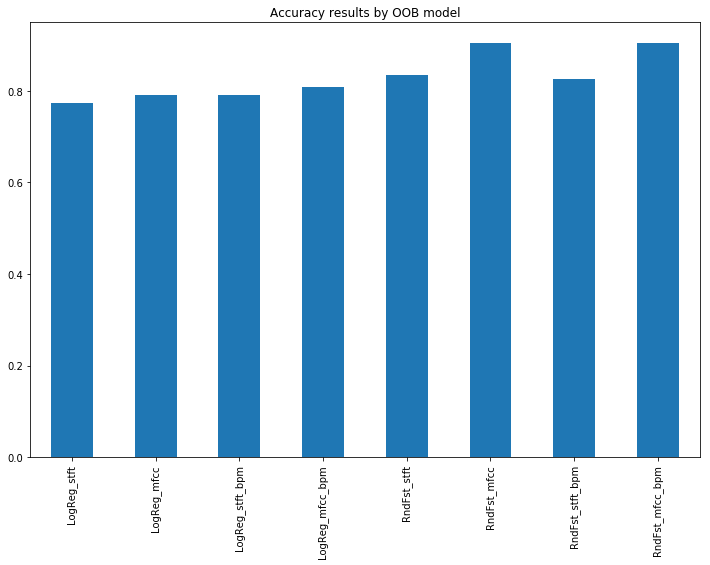

In [177]:
ax = sklearn_results.plot.bar(legend=False, figsize=(12,8))
ax.set_title('Accuracy results by OOB model');

**Conclusion:** Using the Short-time Fourier Transform as input feature yields ***worse*** results than Mel-frequency Cepstral Coefficients (num_ceps=20) for both the linear and non-linear sklearn models. In fact, the Random Forest model using MFCCs yields the best result of all the out-of-the-box methods.